LSTM 신경망 훈련하기 

In [21]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq= pad_sequences(train_input, maxlen=100)
val_seq= pad_sequences(val_input, maxlen=100)

LSTM 셀을 사용한 순환층을 만들기, 
SimpleRNN 클래스를 LSTM 클래스로 바꾸기 

In [23]:
from tensorflow import keras 
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

2절에서 임베딩을 사용했던 순환 신경망 모델과 완전히 동일합니다. 여기에서는 SimpleRNN 대신에 LSTM을 사용

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


SImpleRNN 클래스의 모델 파라미터 개수는 200개였음, LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4배가 늘어 모델 파라미터 개수는 800개가 됨 

모델을 컴파일하고 훈련, 이전과 마찬가지로 배치크기는 64개, 에포크 횟수는 100으로 지정
체크포인트와 조기종료를 위한 코드도 동일 

In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 16ms/step - loss: 0.6926 - accuracy: 0.5329 - val_loss: 0.6921 - val_accuracy: 0.5606
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6906 - accuracy: 0.6102 - val_loss: 0.6887 - val_accuracy: 0.6488
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6814 - accuracy: 0.6774 - val_loss: 0.6646 - val_accuracy: 0.6670
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6321 - accuracy: 0.7071 - val_loss: 0.6114 - val_accuracy: 0.7100
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6010 - accuracy: 0.7211 - val_loss: 0.5925 - val_accuracy: 0.7238
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5811 - accuracy: 0.7394 - val_loss: 0.5756 - val_accuracy: 0.7318
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5635 - accuracy: 0.7505 - val_loss: 0.5605 - val_accuracy: 0.

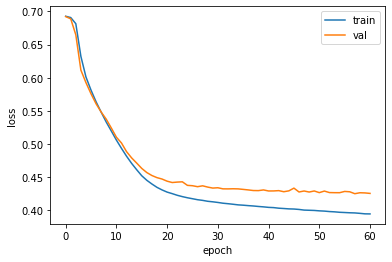

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

그래프를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보임 

하지만 경우에 따라서는 과대적합을 더 강하게 제어할 필요가 있음 

전체적인 모델 구조는 이전과 동일합니다. LSTM클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 드롭아웃

In [27]:
model2= keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 17ms/step - loss: 0.6926 - accuracy: 0.5327 - val_loss: 0.6924 - val_accuracy: 0.5266
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6913 - accuracy: 0.5857 - val_loss: 0.6906 - val_accuracy: 0.5868
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6881 - accuracy: 0.6172 - val_loss: 0.6859 - val_accuracy: 0.6470
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6793 - accuracy: 0.6621 - val_loss: 0.6694 - val_accuracy: 0.6798
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6308 - accuracy: 0.7064 - val_loss: 0.5847 - val_accuracy: 0.7186
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5724 - accuracy: 0.7220 - val_loss: 0.5573 - val_accuracy: 0.7344
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5491 - accuracy: 0.7387 - val_loss: 0.5356 - val_accuracy: 

검증 손실이 약간 향상된 것 같음, 훈련 손실과 검증 손실 그래프를 그려 보겠습니다.

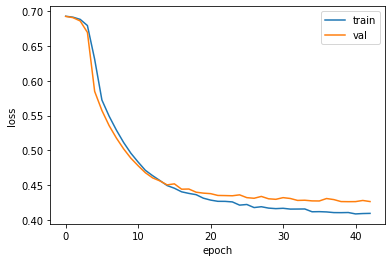

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같음, 훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있음 

In [30]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

2개의 LSTM 층을 쌓았고 모두 드롭아웃을 0.3으로 지정, 그리고 첫 번째 LSTM 클래스에 return_sequences 매개변수를 True로 지정 

In [31]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력 크기가 (None, 100, 8)로 표시됨, 이에 반해 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None,8)입니다. 

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6921 - accuracy: 0.5522 - val_loss: 0.6905 - val_accuracy: 0.5584
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6775 - accuracy: 0.6469 - val_loss: 0.6547 - val_accuracy: 0.6738
Epoch 3/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6376 - accuracy: 0.6809 - val_loss: 0.6224 - val_accuracy: 0.6964
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6047 - accuracy: 0.7136 - val_loss: 0.5890 - val_accuracy: 0.7238
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5711 - accuracy: 0.7346 - val_loss: 0.5563 - val_accuracy: 0.7360
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5444 - accuracy: 0.7474 - val_loss: 0.5363 - val_accuracy: 0.7498
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5256 - accuracy: 0.7571 - val_loss: 0.5171 - val_accuracy:

모델이 잘 훈련됨, 일반적으로 순환층을 쌓으면 성능이 높아짐

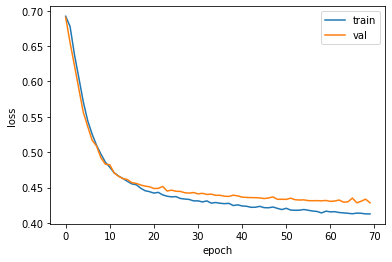

In [33]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.xlabel('epoch') 
plt.ylabel('loss') 
plt.legend(['train', 'val']) 
plt.show()

그래프를 보면 과대적합을 제어하면서 손실을 최대한 낮춘 것 같음 

### GRU 신경망 훈련하기 

In [39]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

LSTM 클래스를 GRU 클래스로 바뀐 것 외에는 이전 모델과 동일함 

In [40]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


GRU층의 모델파라미터 개수를 계산하기 

GRU 셀에는 3개의 작은 셀이 있고 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있음 

입력에 곱하는 가중치는 16 x 8 = 128 개, 은닉 상태에 곱하는 가중치는 8 x 8 = 64개입니다. 
그리고 절편은 뉴런마다 하나씩이므로 8개입니다. 모두 더하면 128 + 64 + 8 = 200개 입니다. 이런 작은 셀이 3개이므로 모두 600개의 모델 파라미터가 필요합니다. 하지만 summary() 메서드의 출력은 624개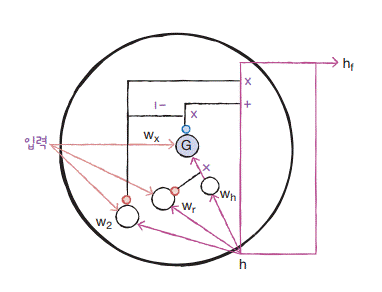

G로 표시된 작은 셀에 들어가는 입력부분이 다르다, 은닉 상태가 먼저 가중치와 곱해진 다음 가운데 셀 출력과 곱해진다, 그래서 이전에는 입력과 은닉상태에 곱해지는 가중치를 Wg로 별도 표기, 그림에서는 Wx와 Wh로 나누었음 

이렇게 나누어 계산하면 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요함 
따라서 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해진다. 따라서 GRU 층의 총 모델 파라미터 개수는 624개가 된다. 

In [41]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6928 - accuracy: 0.5242 - val_loss: 0.6925 - val_accuracy: 0.5344
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6917 - accuracy: 0.5533 - val_loss: 0.6912 - val_accuracy: 0.5486
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6897 - accuracy: 0.5743 - val_loss: 0.6887 - val_accuracy: 0.5734
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6862 - accuracy: 0.6008 - val_loss: 0.6843 - val_accuracy: 0.6052
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6803 - accuracy: 0.6186 - val_loss: 0.6776 - val_accuracy: 0.6106
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6712 - accuracy: 0.6297 - val_loss: 0.6675 - val_accuracy: 0.6222
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6576 - accuracy: 0.6446 - val_loss: 0.6521 - val_accuracy: 0.63

LSTM와 거의 비슷한 성능을 냄 


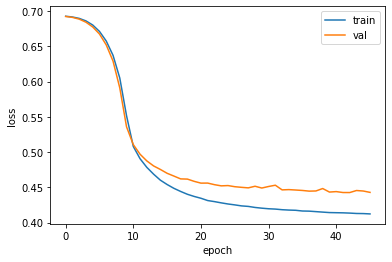

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실과 검증 손실 사이에 차이가 있지만 훈련과정이 잘 수렴되고 있는 것을 확인할 수 있다.

### 가장 좋았던 2개의 순환층을 쌓은 모델을 다시 로드하여 테스트 세트에 대한 성능을 확인하자

In [43]:
test_seq= pad_sequences(test_input, maxlen=100)
rnn_model= keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4240 - accuracy: 0.8023


[0.4240121841430664, 0.8022800087928772]